# Context

### A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

# Content

#### AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
#### AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
#### AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
#### AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
#### AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
#### Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
#### Complain - 1 if customer complained in the last 2 years
#### DtCustomer - date of customer’s enrolment with the company
#### Education - customer’s level of education
#### Marital - customer’s marital status
#### Kidhome - number of small children in customer’s household
#### Teenhome - number of teenagers in customer’s household
#### Income - customer’s yearly household income
#### MntFishProducts - amount spent on fish products in the last 2 years
#### MntMeatProducts - amount spent on meat products in the last 2 years
#### MntFruits - amount spent on fruits products in the last 2 years
#### MntSweetProducts - amount spent on sweet products in the last 2 years
#### MntWines - amount spent on wine products in the last 2 years
#### MntGoldProds - amount spent on gold products in the last 2 years
#### NumDealsPurchases - number of purchases made with discount
#### NumCatalogPurchases - number of purchases made using catalogue
#### NumStorePurchases - number of purchases made directly in stores
#### NumWebPurchases - number of purchases made through company’s web site
#### NumWebVisitsMonth - number of visits to company’s web site in the last month
#### Recency - number of days since the last purchase 

## OBJECTIVE

### we analyze customer data to gain insights into the spending habits, demographic information, and campaign acceptance patterns of customers. The dataset contains information on various customer characteristics, such as age, income, education level, marital status, web visits, purchases, and campaign acceptance.



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm  import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [7]:
# To display all the columns when outputting data to the console.
pd.set_option('display.max_columns', None)

In [8]:
#Reading the file
df=pd.read_csv("C:\\Users\\USER\\DA\\Data Sets\\PROJECT DATASETS\\classification\\marketing_campaign.csv",sep=";")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [9]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [10]:
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1561,879,1976,Master,Married,49681.0,0,2,2013-11-04,66,411,0,26,0,0,21,6,7,1,7,7,0,0,0,0,0,0,3,11,0
1044,6287,1986,Graduation,Together,34728.0,1,0,2013-07-30,2,14,0,16,0,0,6,1,1,1,2,6,0,0,0,0,0,0,3,11,1
1755,5394,1979,Basic,Single,16014.0,1,1,2013-03-17,42,3,9,4,7,8,7,4,1,1,4,3,0,0,0,0,0,0,3,11,0
800,310,1970,Master,Married,61872.0,0,1,2013-12-13,81,330,5,159,36,27,16,4,4,4,9,4,0,0,0,0,0,0,3,11,0
87,4452,1957,Graduation,Single,50388.0,0,1,2014-05-28,3,292,6,37,0,3,34,4,6,1,6,7,0,1,0,1,0,0,3,11,1
618,8650,1978,Graduation,Widow,54162.0,1,1,2013-03-18,31,5,6,10,6,5,10,1,1,0,3,4,0,0,0,0,0,0,3,11,0
144,9701,1988,Graduation,Together,41883.0,1,0,2013-03-19,13,32,34,41,73,16,116,3,4,2,3,7,0,0,0,0,0,0,3,11,0
1562,9530,1988,Graduation,Married,24645.0,1,0,2012-11-01,16,5,3,4,4,1,0,1,1,0,2,8,0,0,0,0,0,0,3,11,0
989,453,1956,PhD,Widow,35340.0,1,1,2014-06-29,1,27,0,12,0,1,5,2,2,0,3,5,0,0,0,0,0,0,3,11,0
1242,4138,1962,Graduation,Single,76624.0,0,1,2014-05-24,68,411,106,147,54,115,66,1,5,10,7,1,1,0,0,0,0,0,3,11,0


In [11]:
df.shape

(2240, 29)

In [12]:
df.size

64960

In [13]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [15]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [20]:
df["Income"].fillna(df["Income"].mean(),inplace=True)
df["Income"] = df["Income"].astype(float)

In [22]:
df.duplicated().sum()

0

In [10]:
# calculate customers spending
df['spending'] = df.MntFishProducts+df.MntFruits+df.MntGoldProds+df.MntMeatProducts+df.MntSweetProducts+df.MntWines

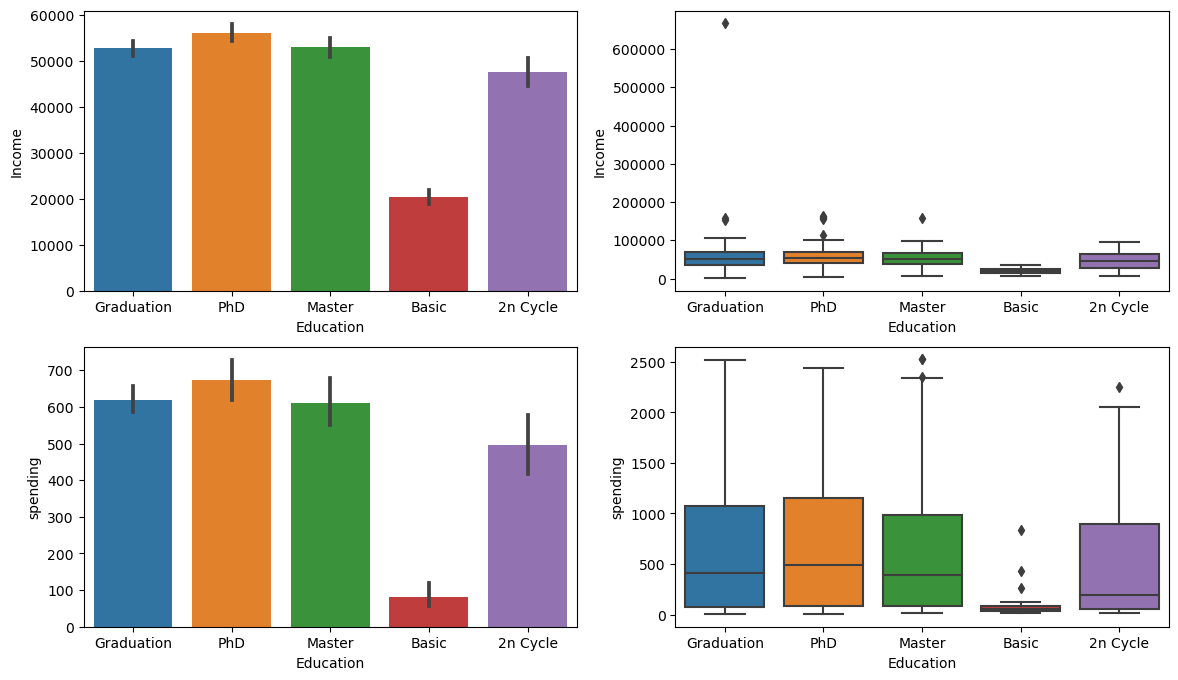

In [12]:
# Income and spending by education
fig,ax = plt.subplots(2,2,figsize=(14,8))
sns.barplot(x='Education',y='Income',data=df,ax=ax[0,0])
sns.boxplot(x='Education',y='Income',data=df,ax=ax[0,1])
sns.barplot(x='Education',y='spending',data=df,ax=ax[1,0])
sns.boxplot(x='Education',y='spending',data=df,ax=ax[1,1])
plt.show()

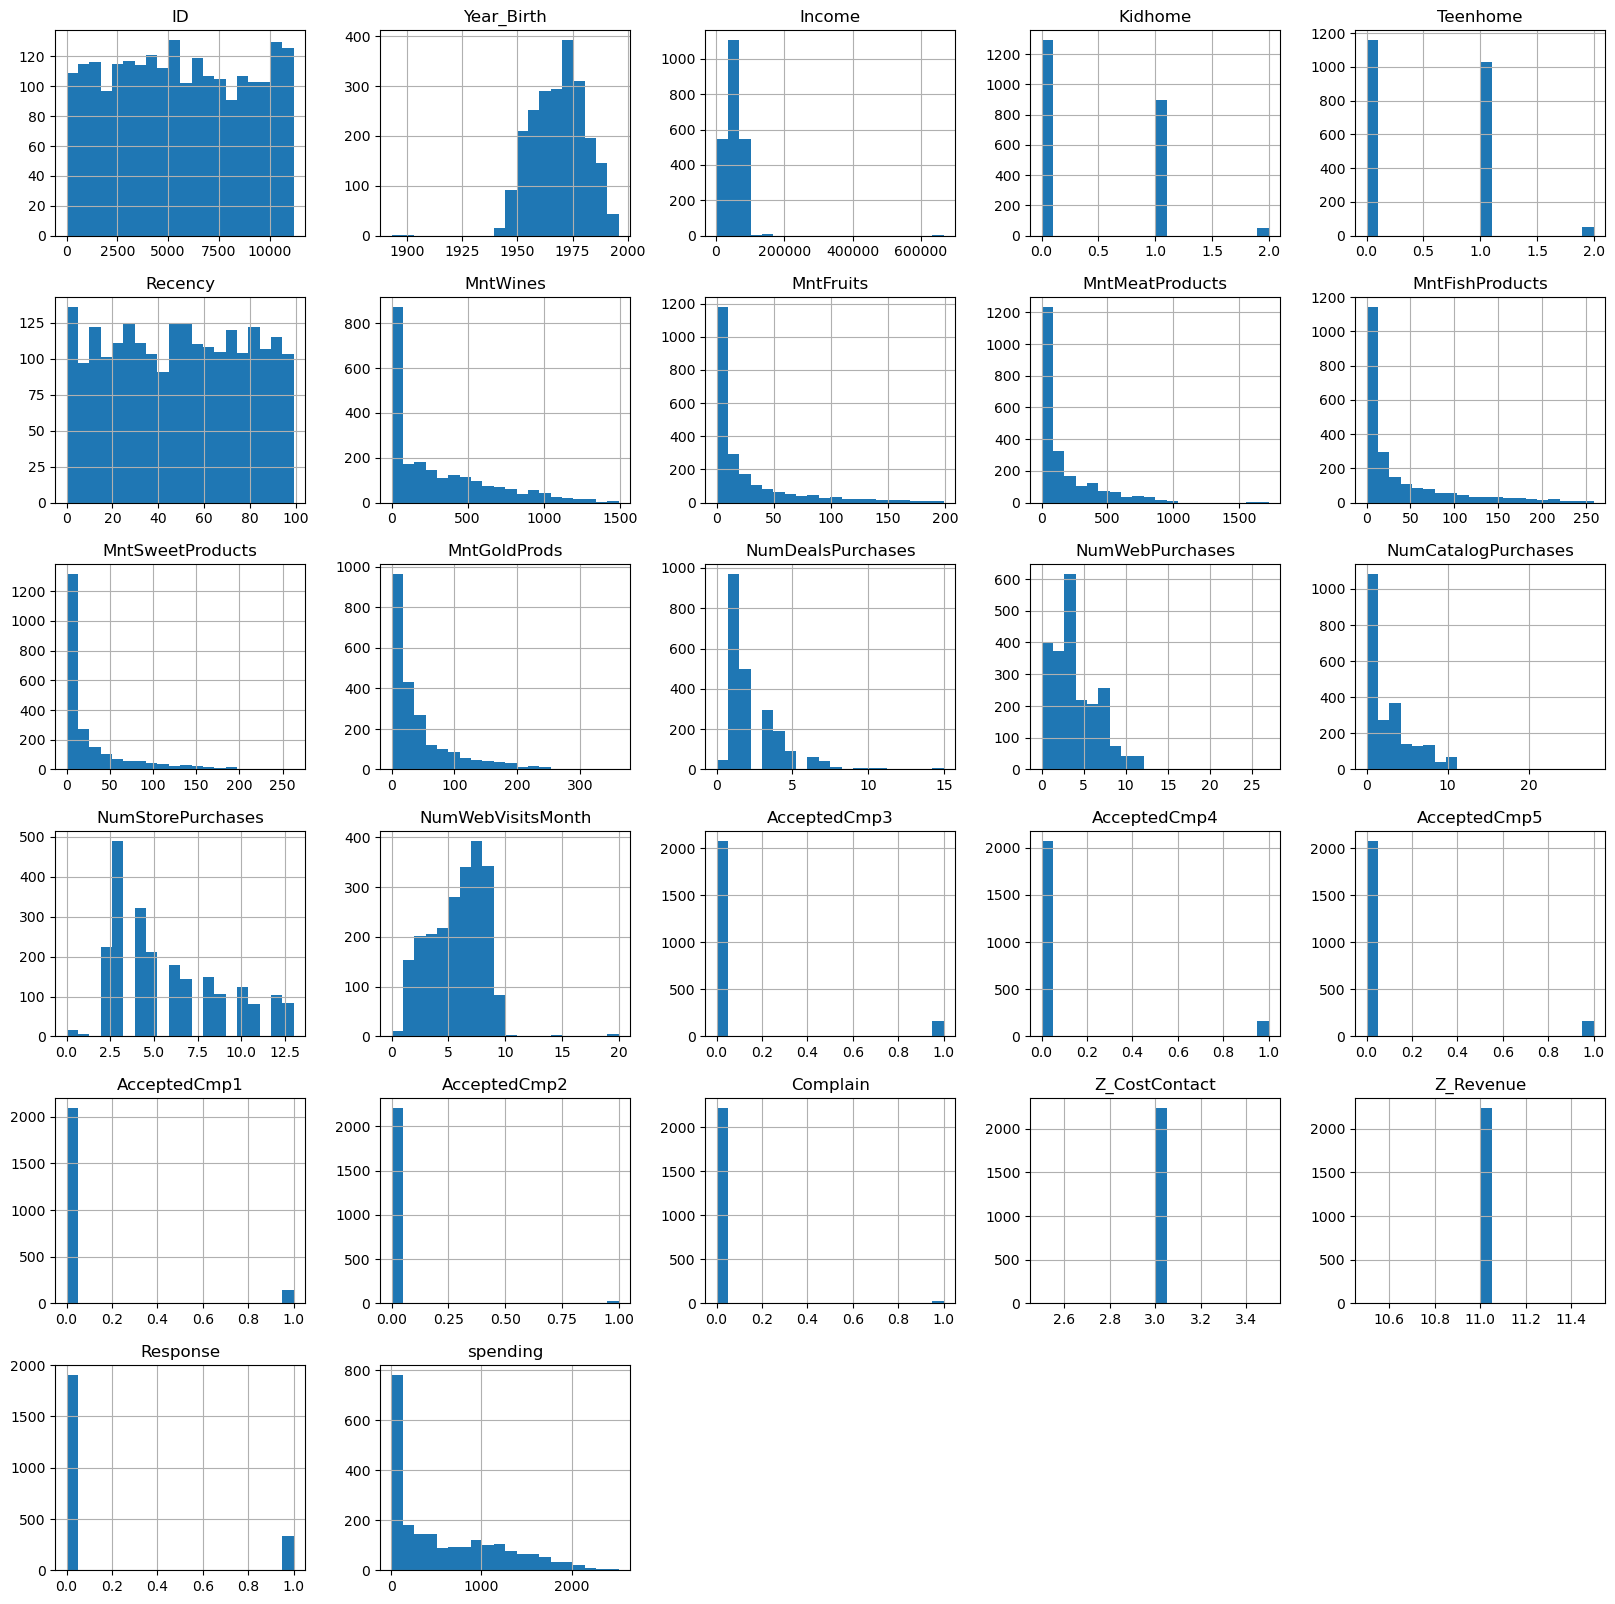

In [24]:
# Distribution of numerical variables
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols].hist(bins=20, figsize=(20,20))
plt.show()

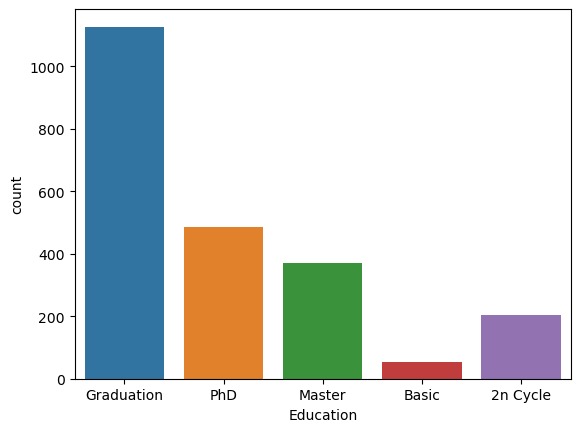

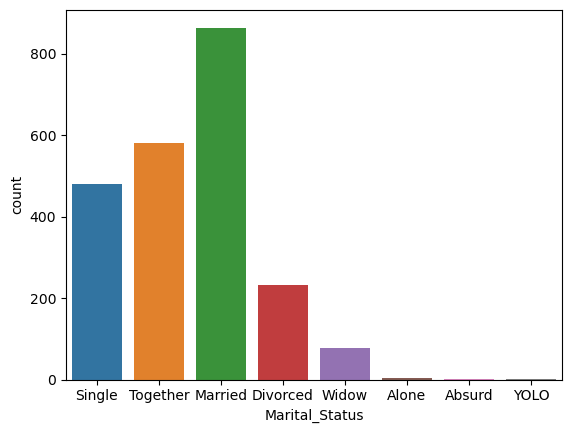

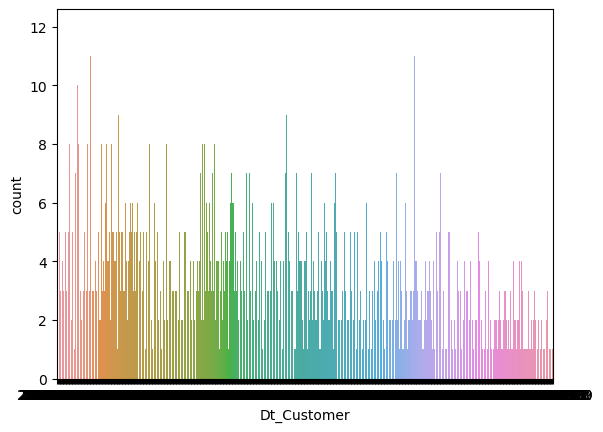

In [25]:
# Distribution of categorical variables
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.show()

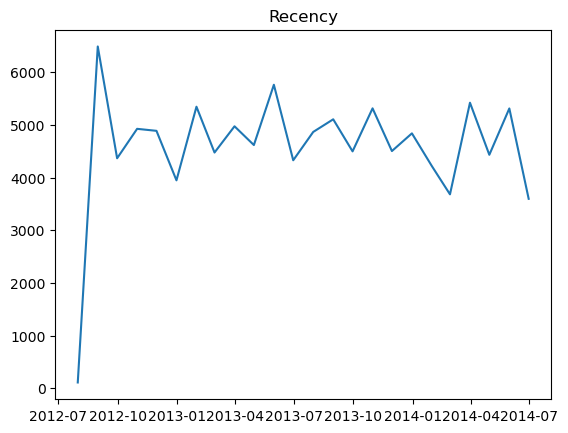

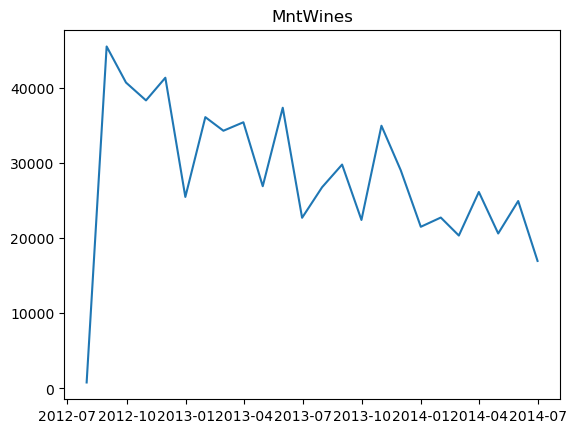

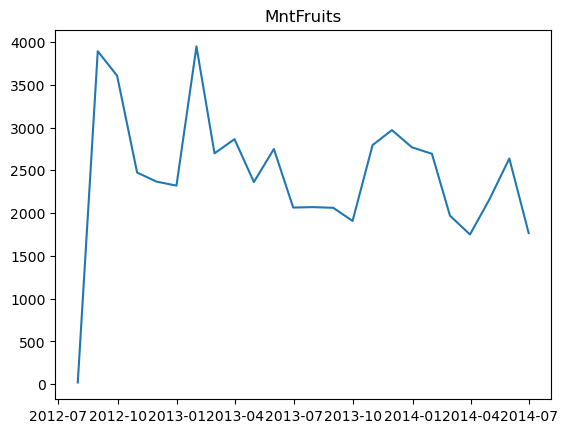

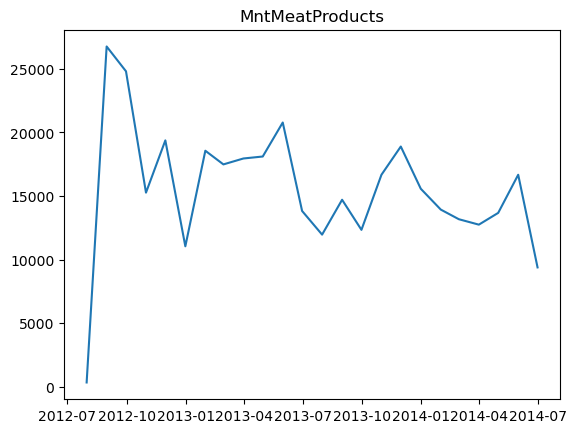

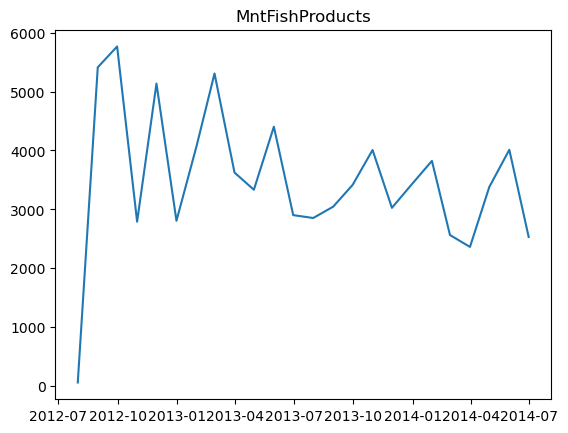

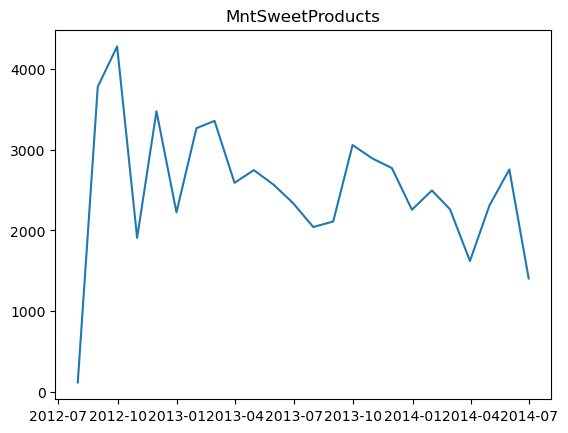

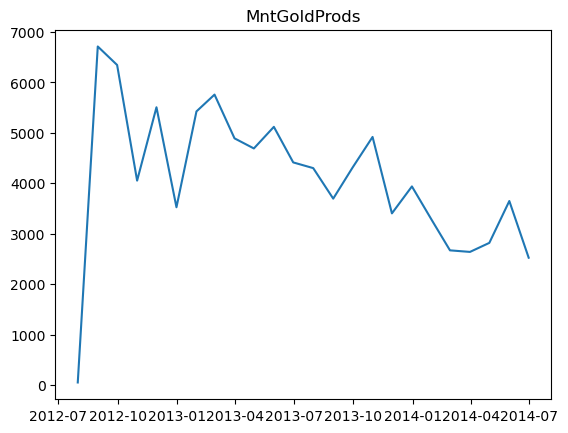

In [26]:
# Line plots of time series data
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df_ts = df.set_index('Dt_Customer')
ts_cols = ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for col in ts_cols:
    plt.plot(df_ts[col].resample('M').sum())
    plt.title(col)
    plt.show()


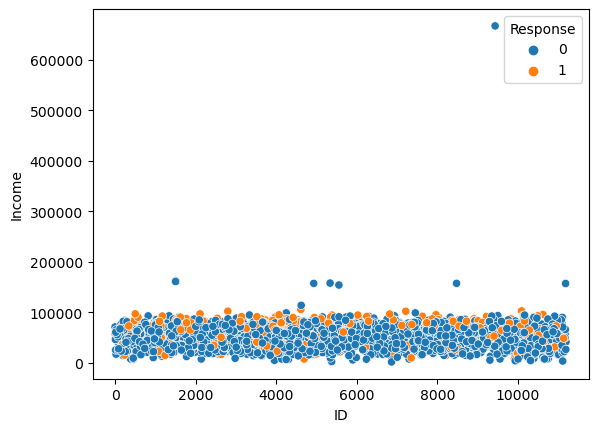

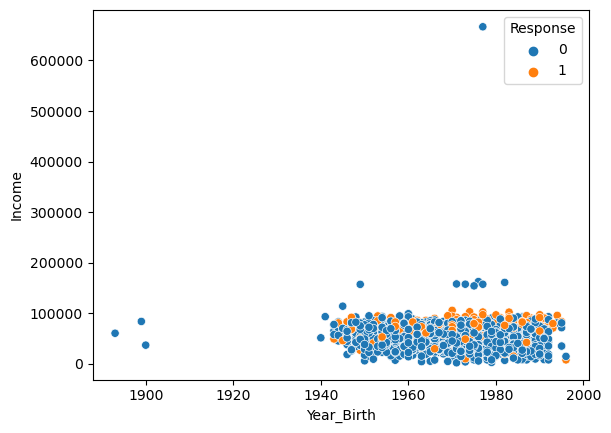

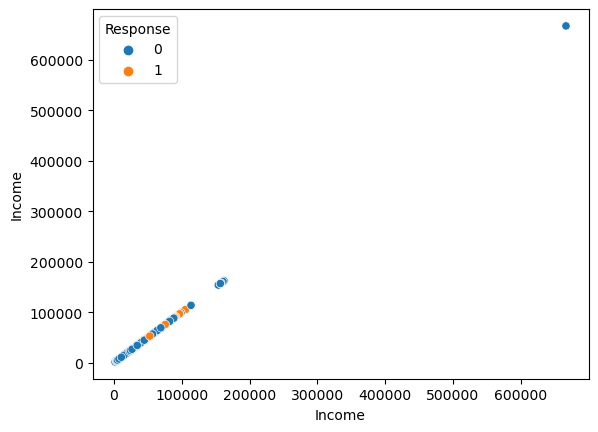

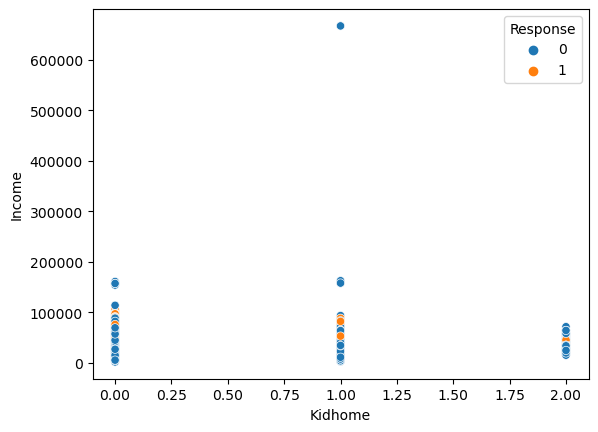

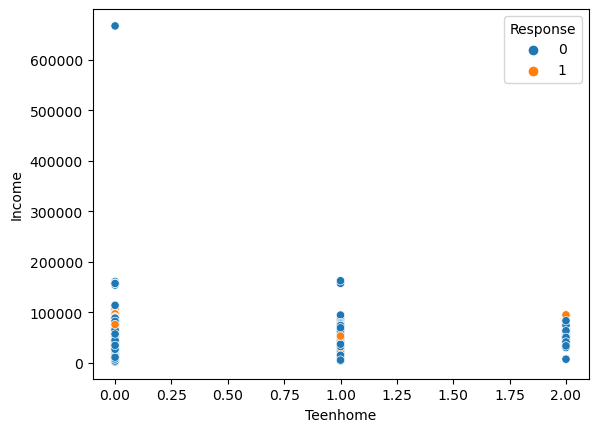

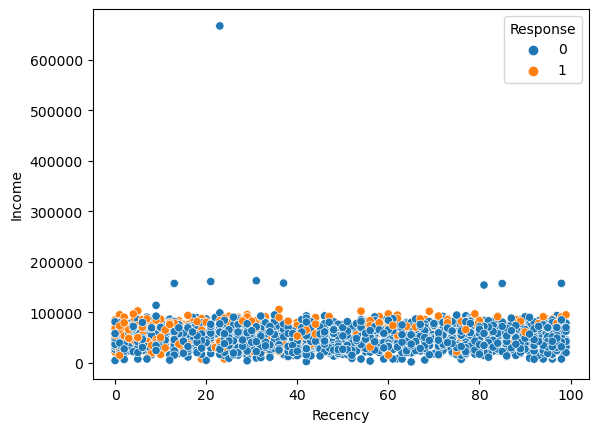

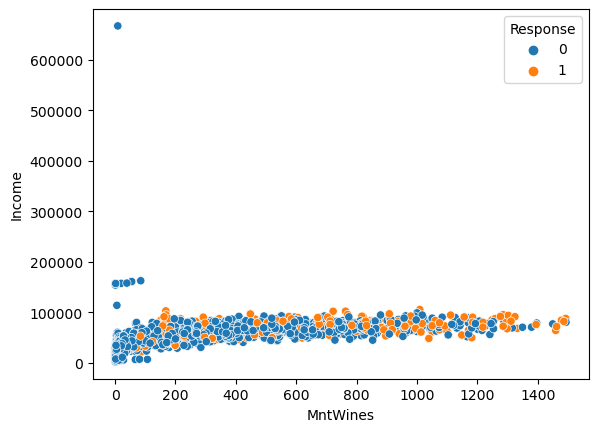

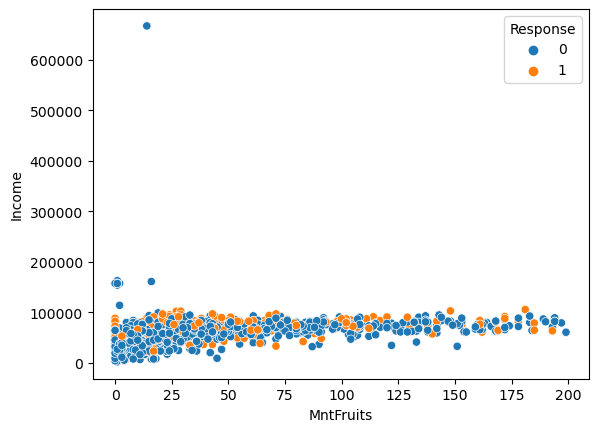

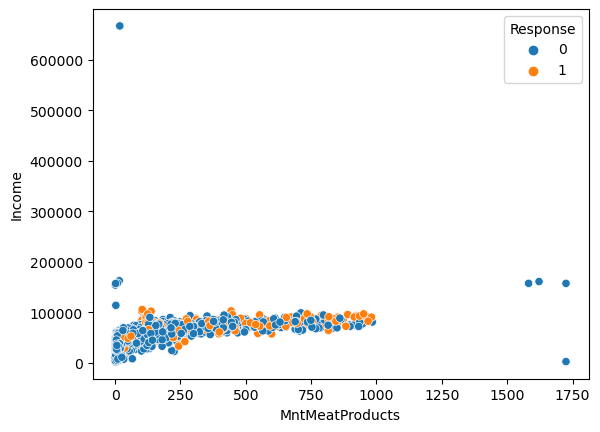

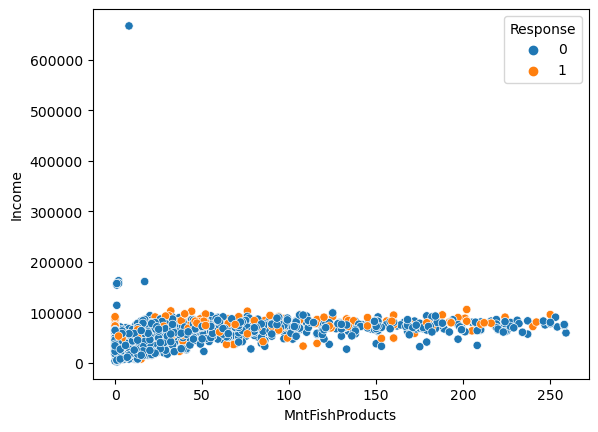

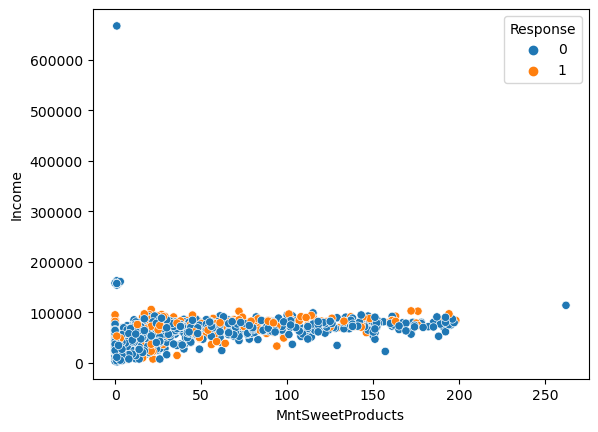

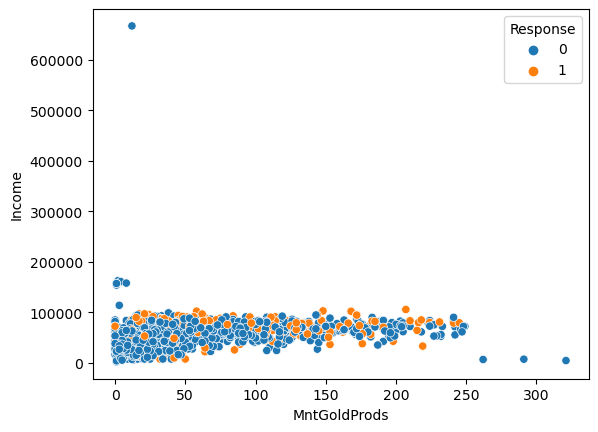

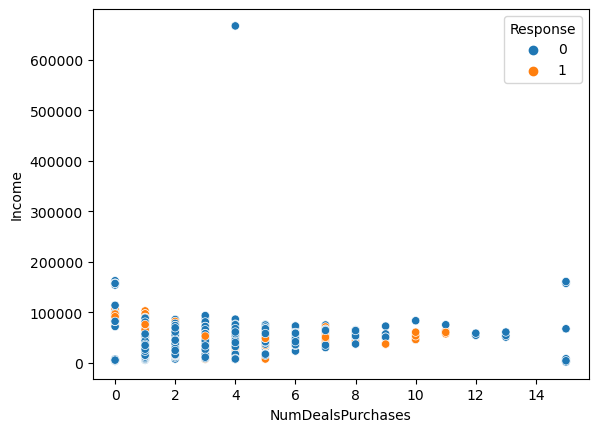

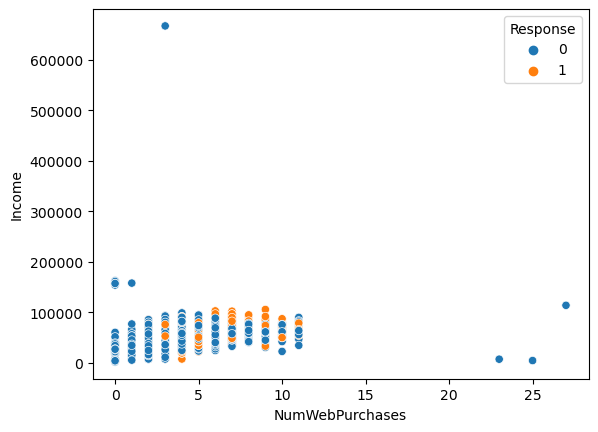

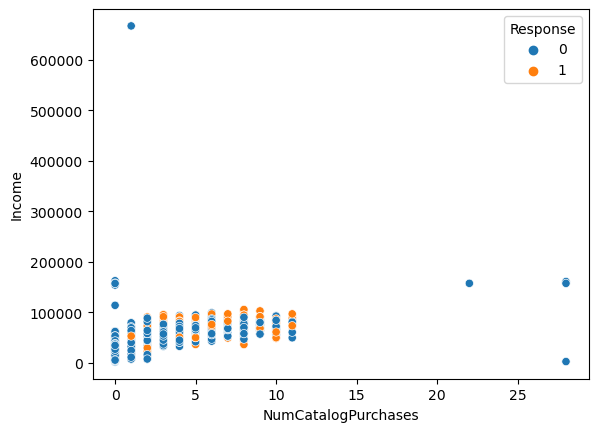

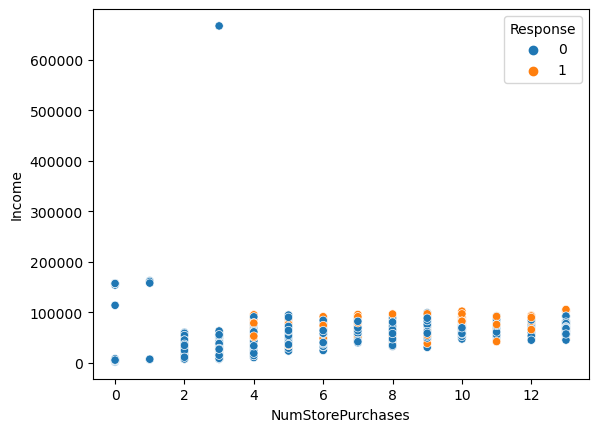

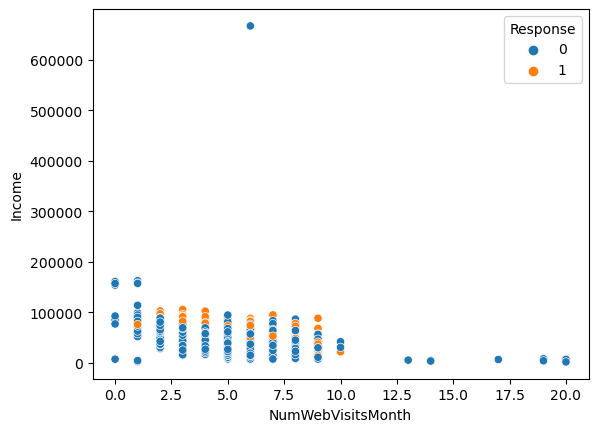

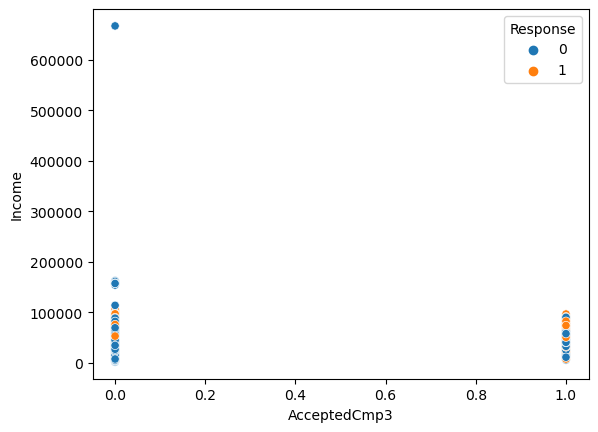

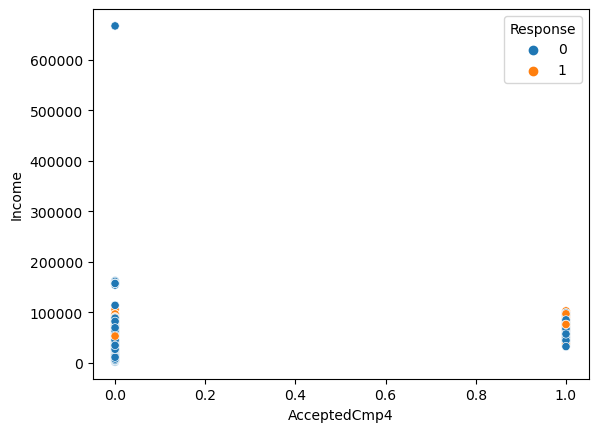

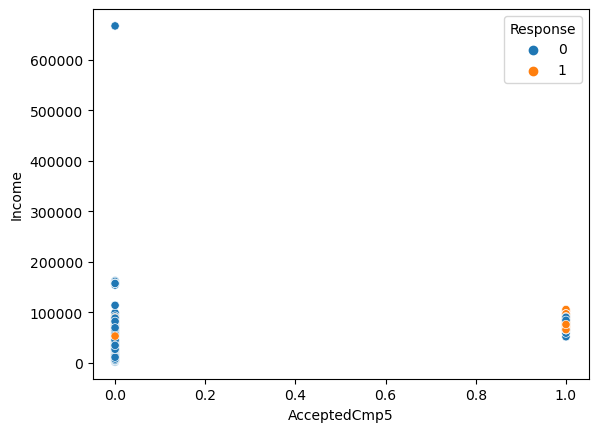

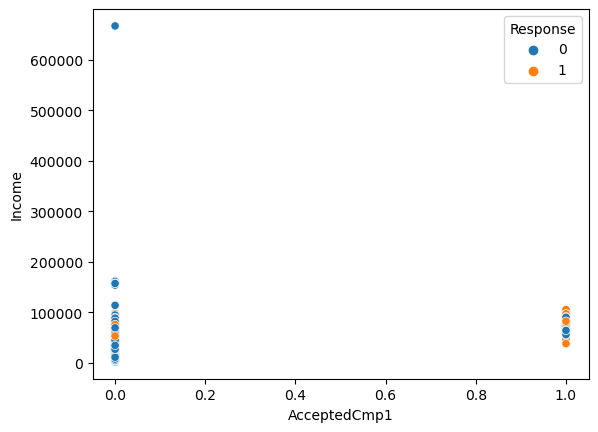

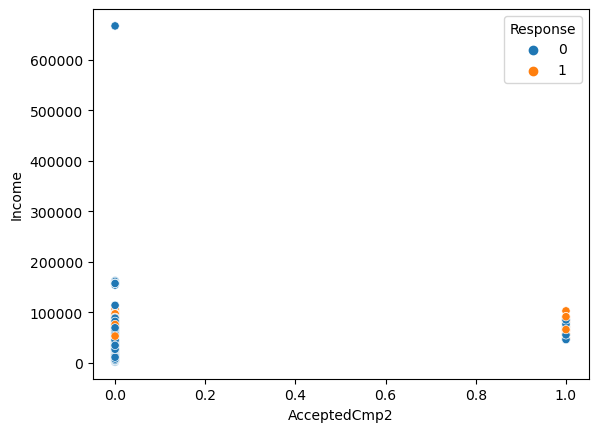

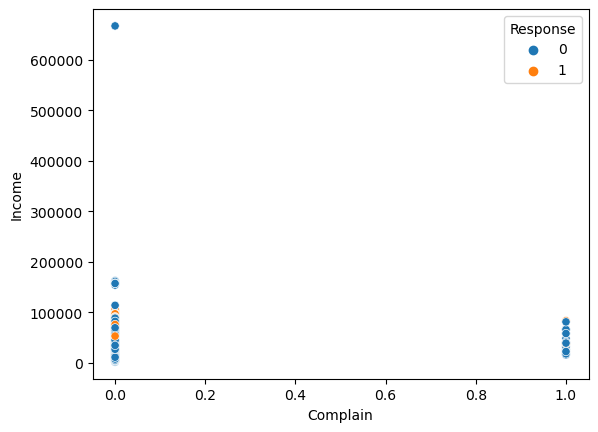

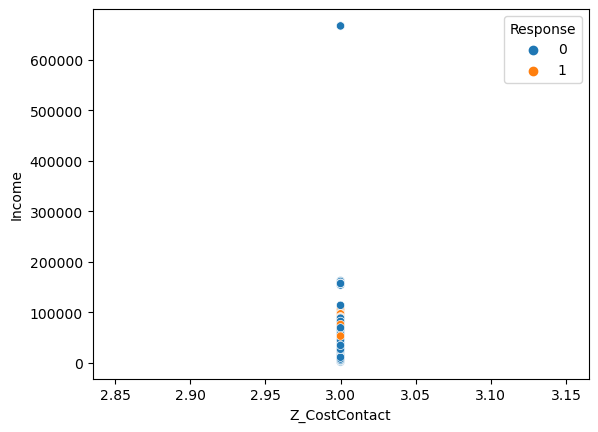

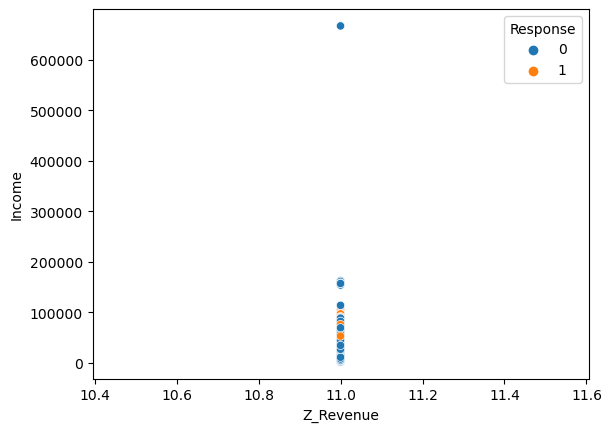

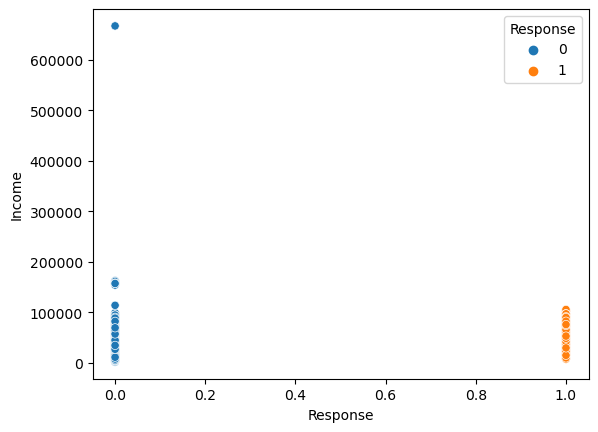

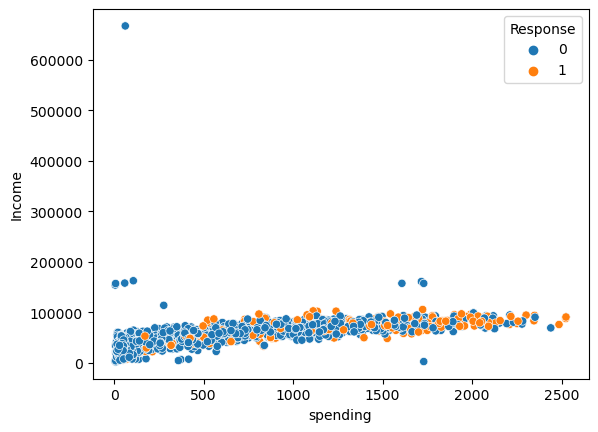

In [27]:
# Scatter plots of numerical variables by target variable
for col in num_cols:
    sns.scatterplot(x=col, y='Income', hue='Response', data=df)
    plt.show()

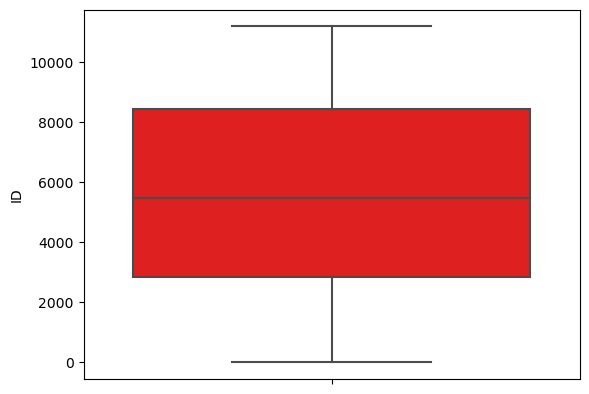

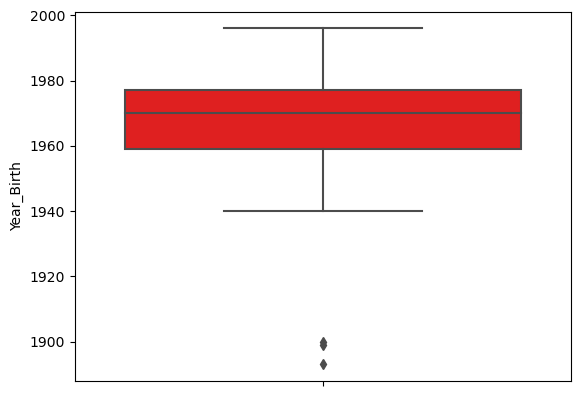

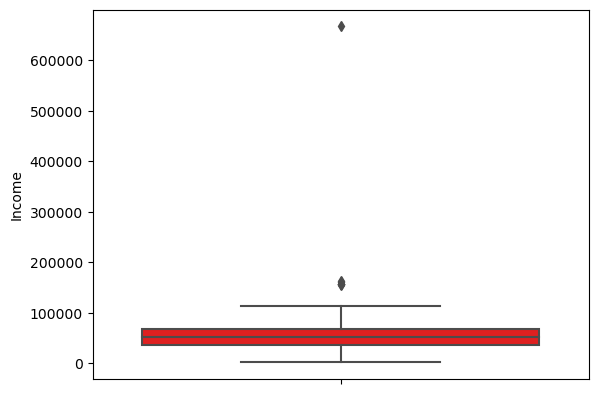

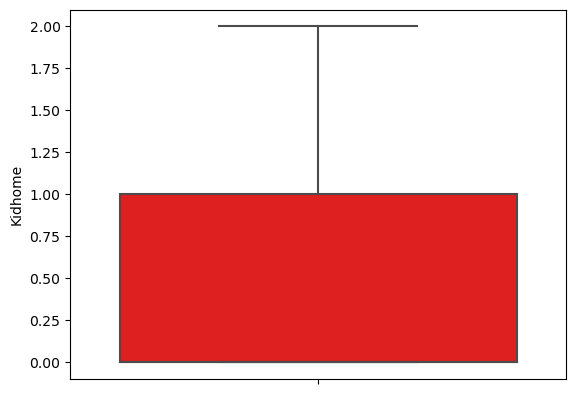

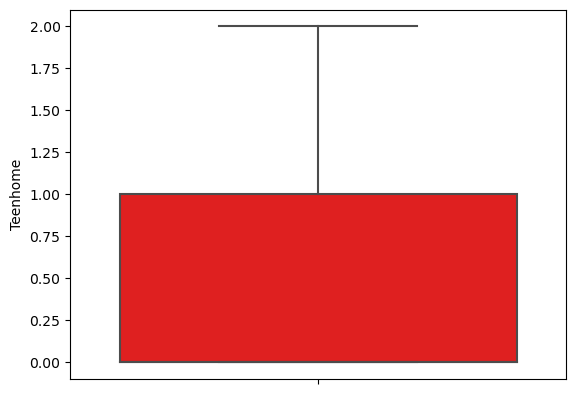

TypeError: Vertical orientation requires numeric `y` variable.

In [28]:
#Box plots of numerical variables
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="red")
        plt.show()

In [24]:
#Removing the outliers
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL


for column in df.columns:
    if df[column].dtype != "object":
        UL, LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

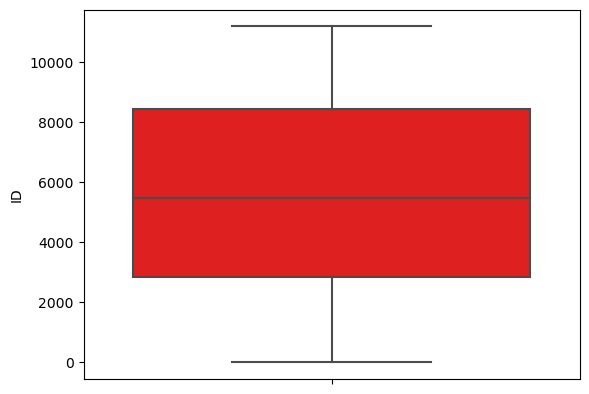

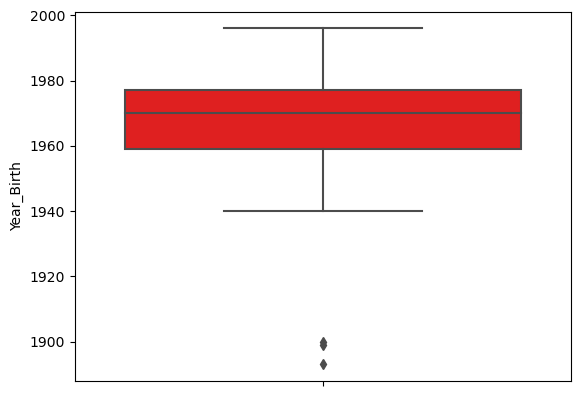

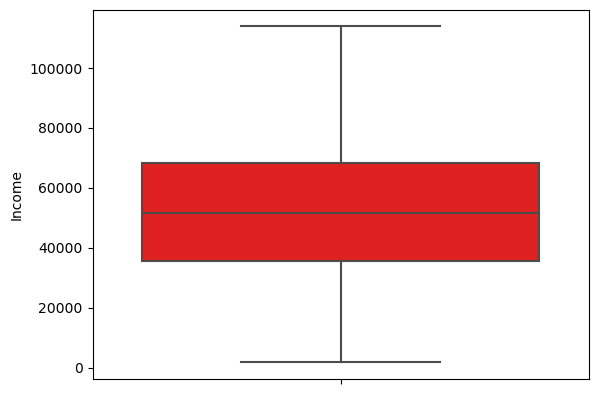

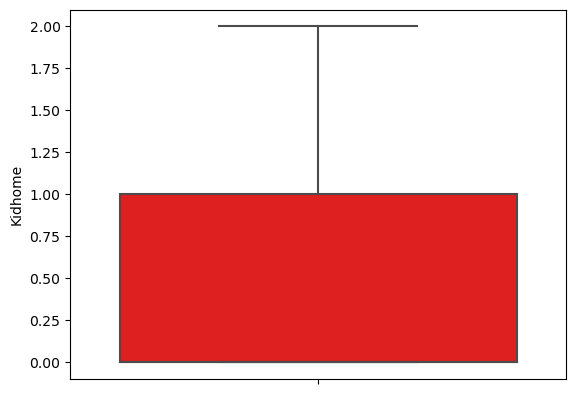

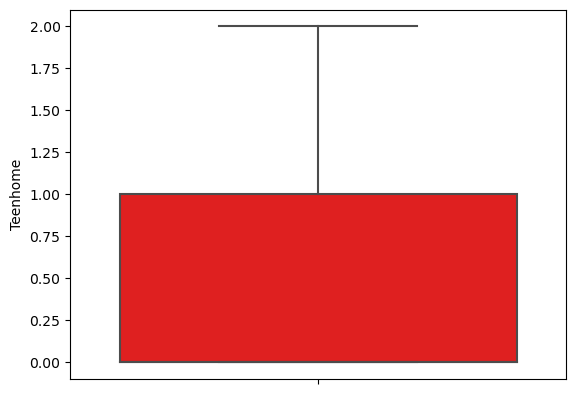

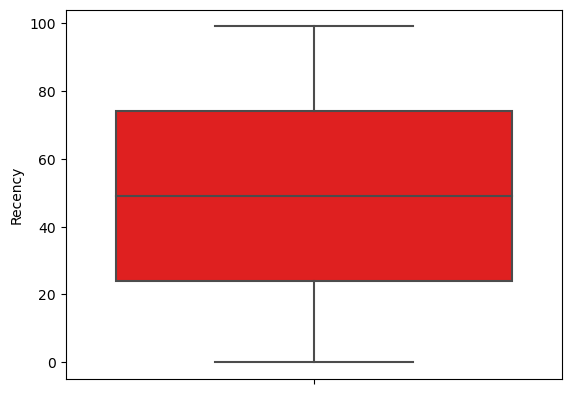

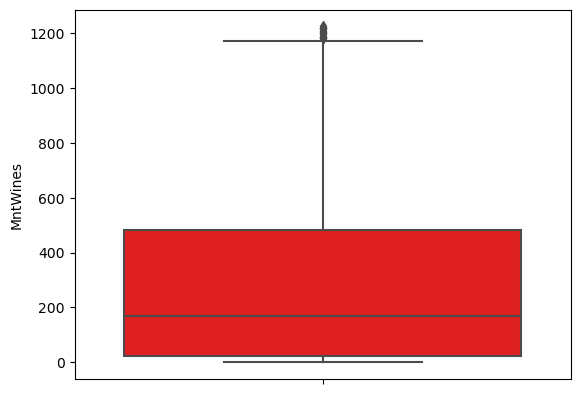

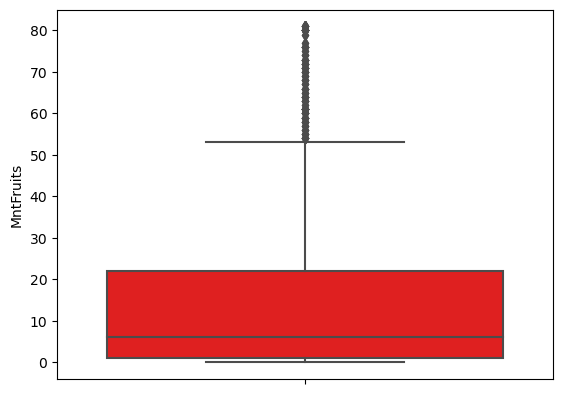

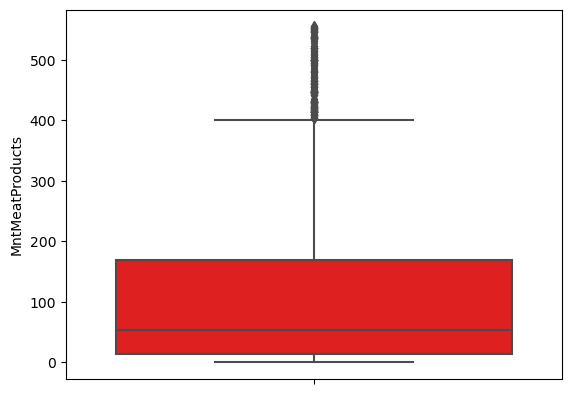

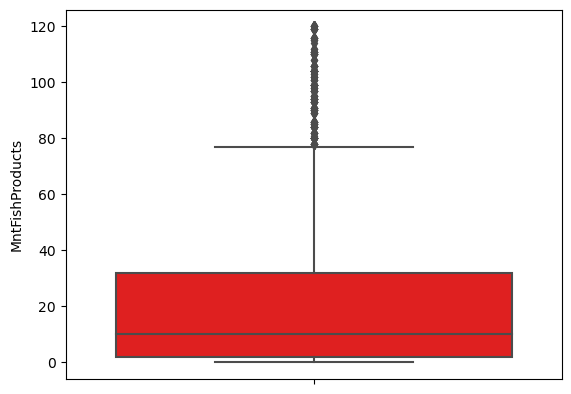

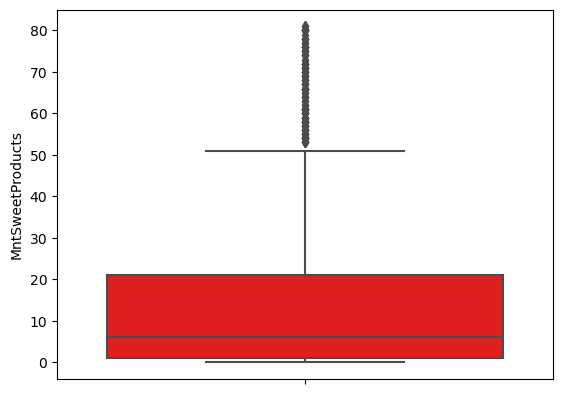

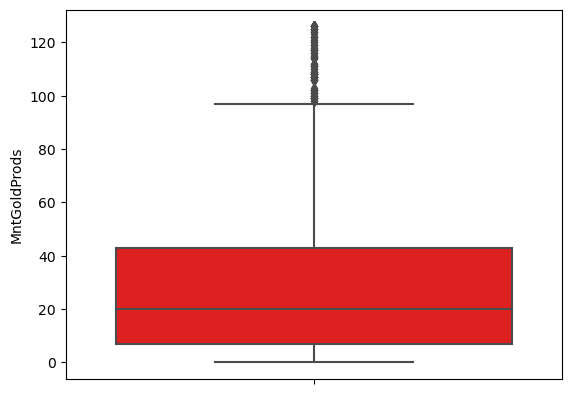

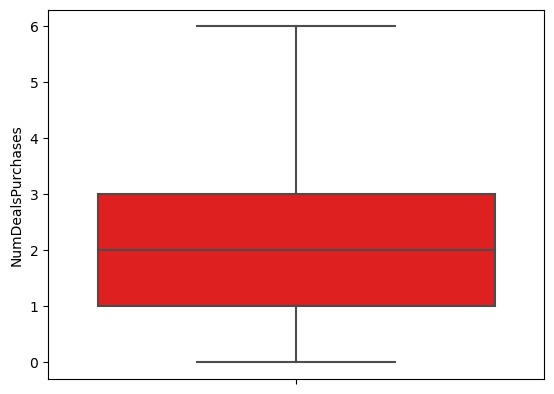

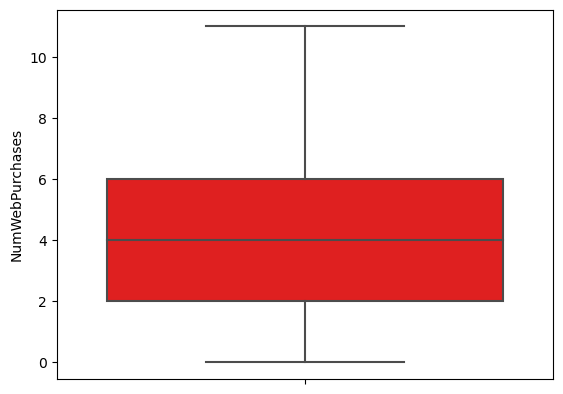

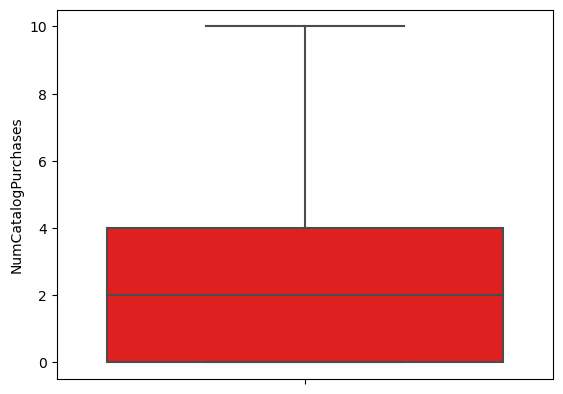

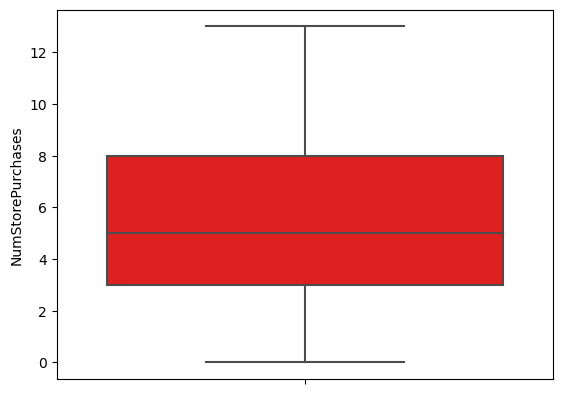

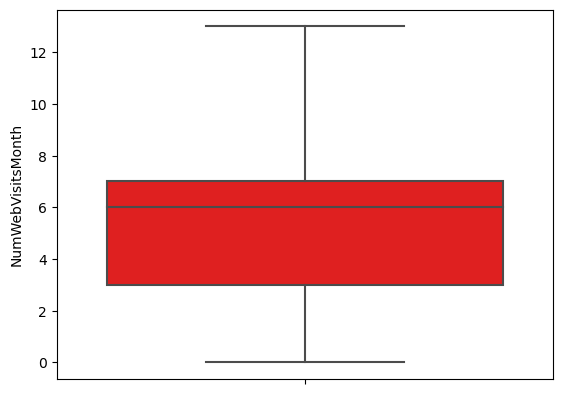

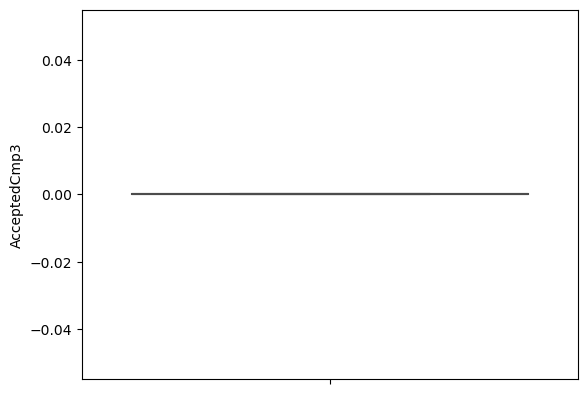

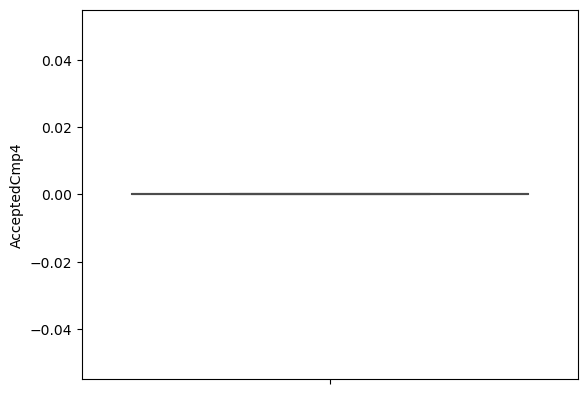

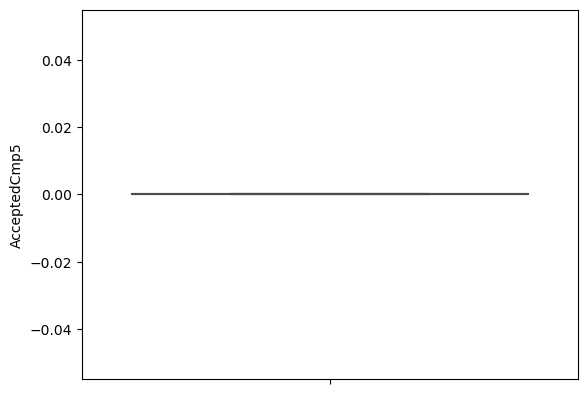

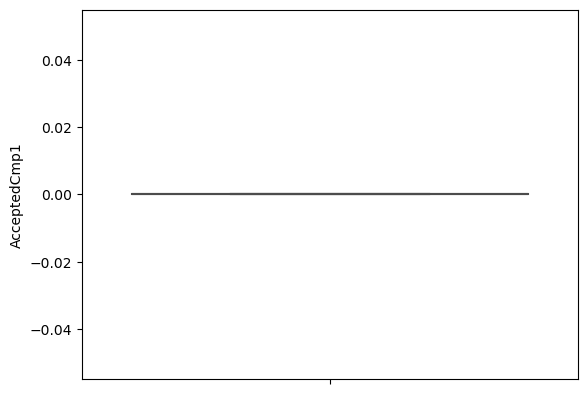

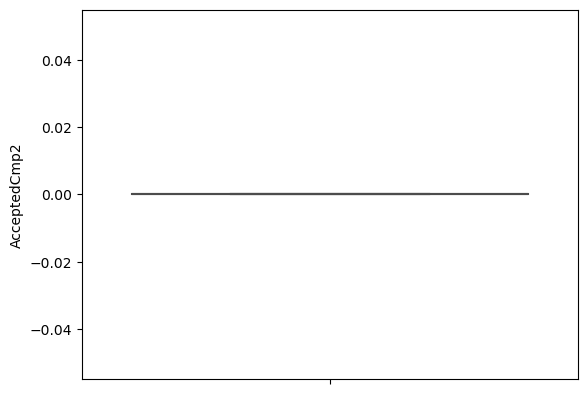

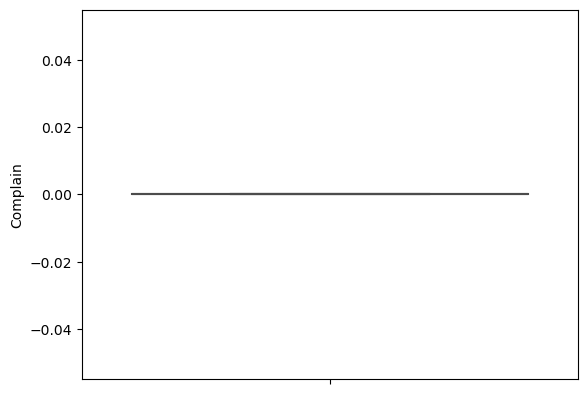

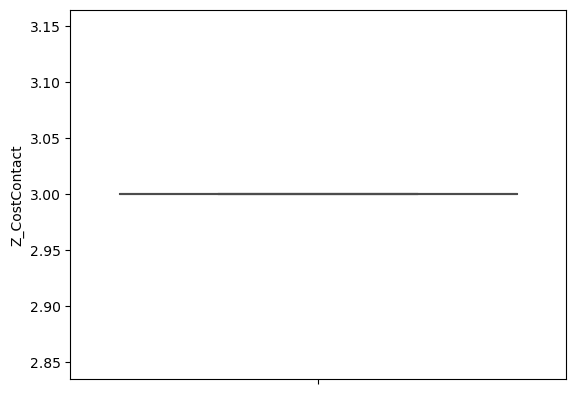

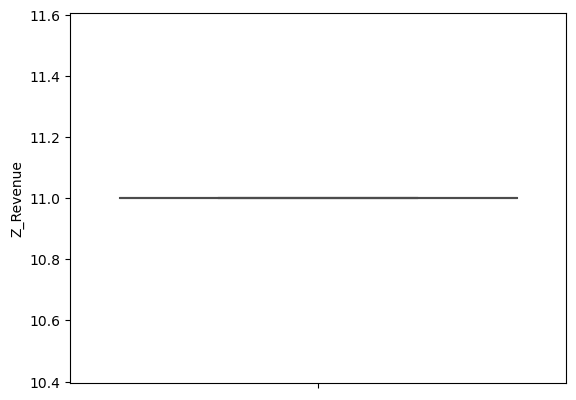

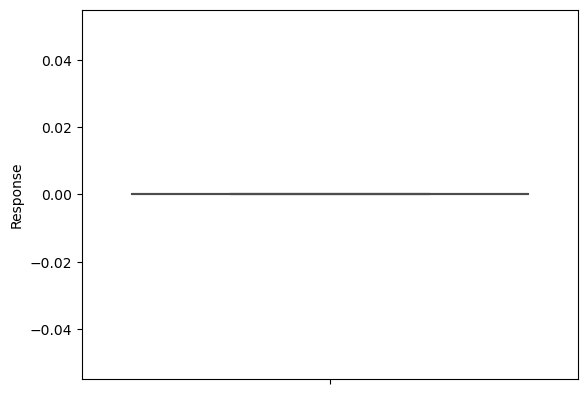

In [25]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="red")
        plt.show()

In [28]:
df.isnull().mean()*100

ID                      0.000000
Year_Birth              0.000000
Education               0.000000
Marital_Status          0.000000
Income                  0.357143
Kidhome                 0.000000
Teenhome                0.000000
Dt_Customer             0.000000
Recency                 0.000000
MntWines                1.562500
MntFruits              10.133929
MntMeatProducts         7.812500
MntFishProducts         9.955357
MntSweetProducts       11.071429
MntGoldProds            9.241071
NumDealsPurchases       3.839286
NumWebPurchases         0.178571
NumCatalogPurchases     1.026786
NumStorePurchases       0.000000
NumWebVisitsMonth       0.357143
AcceptedCmp3            7.276786
AcceptedCmp4            7.455357
AcceptedCmp5            7.276786
AcceptedCmp1            6.428571
AcceptedCmp2            1.339286
Complain                0.937500
Z_CostContact           0.000000
Z_Revenue               0.000000
Response               14.910714
dtype: float64

In [29]:
#filling the NAN values with mean
df["Income"].fillna(df["Income"].mean(),inplace=True)
df["MntWines"].fillna(df["MntWines"].mean(),inplace=True)
df["MntFruits"].fillna(df["MntFruits"].mean(),inplace=True)
df["MntMeatProducts"].fillna(df["MntMeatProducts"].mean(),inplace=True)
df["MntFishProducts"].fillna(df["MntFishProducts"].mean(),inplace=True)
df["MntSweetProducts"].fillna(df["MntSweetProducts"].mean(),inplace=True)
df["MntGoldProds"].fillna(df["MntGoldProds"].mean(),inplace=True)
df["NumDealsPurchases"].fillna(df["NumDealsPurchases"].mean(),inplace=True)
df["Income"].fillna(df["Income"].mean(),inplace=True)



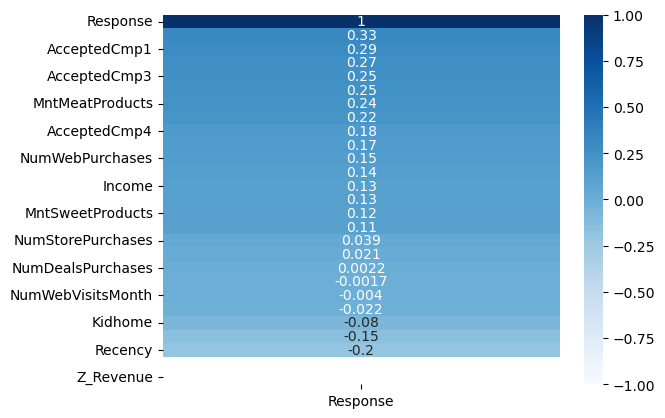

In [33]:
#lets check the correlation between variables
sns.heatmap(df.corr()[["Response"]].sort_values(by="Response", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues");


In [34]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   int32         
 3   Marital_Status       2240 non-null   int32         
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [39]:
x = df.drop(["Response","Dt_Customer"], axis=1)
y = df["Response"]

In [40]:
sc=StandardScaler()

In [41]:
x= sc.fit_transform(x)

In [42]:
models = {
    "LogisticRegression": LogisticRegression(),
    "Ridge":RidgeClassifier(),
    "SVC":SVC(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "XGBClassifier":XGBClassifier(),
    "CatBoostClassifier":CatBoostClassifier()
}

In [43]:
for name, model in models.items():
    scores = cross_val_score(model, x,y,cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    print("Mean Score: ",np.mean(scores))
    print("*"*100)

cross validation model : LogisticRegression
Mean Score:  0.8803571428571428
****************************************************************************************************
cross validation model : Ridge
Mean Score:  0.8741071428571429
****************************************************************************************************
cross validation model : SVC
Mean Score:  0.8799107142857144
****************************************************************************************************
cross validation model : DecisionTreeClassifier
Mean Score:  0.8299107142857143
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Mean Score:  0.8830357142857144
****************************************************************************************************
cross validation model : AdaBoostClassifier
Mean Score:  0.879017857142857
********************************************************

In [57]:
model=GradientBoostingClassifier()

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [59]:
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [60]:
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with GradientBoostingClassifier()
Model accuracy on train is::  0.9436383928571429
Model accuracy on test is::  0.8727678571428571
confusion_matrix train is::  [[1534    4]
 [  97  157]]
confusion_matrix test is::  [[361   7]
 [ 50  30]]
Wrong Predictions made: 57 / 448
************************************************************


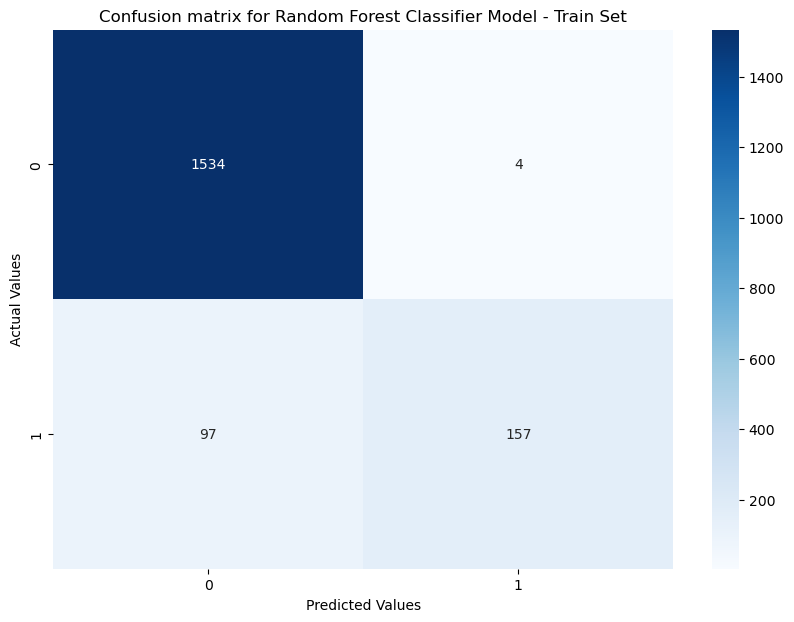

In [61]:
# Plotting the confusion matrix for training set
plt.figure(figsize=(10,7))
p = sns.heatmap(con_train, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

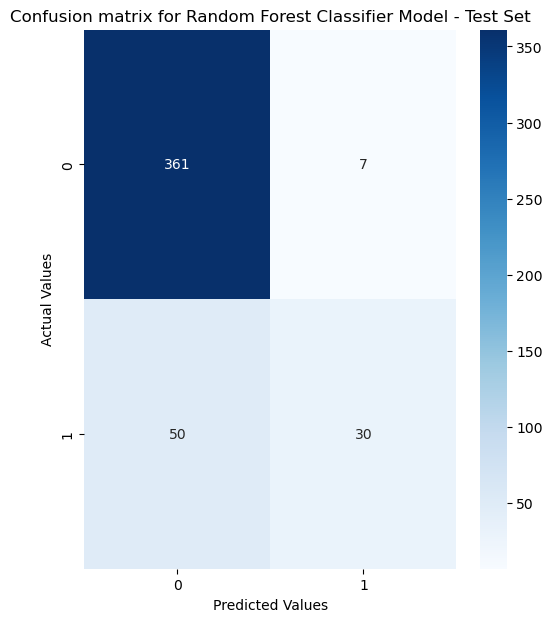

In [62]:
# Plotting the confusion matrix for test set
plt.figure(figsize=(6,7))
p = sns.heatmap(con_test, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [63]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)
OUTPUT

,ACTUAL,PREDICTION
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2235,0,0
2236,0,0
2237,0,0
2238,0,0


In [66]:
# Accuracy Score
score = round(accuracy_score(y_test,model.predict(x_test)),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 87.28%


model used is :: GradientBoostingClassifier()


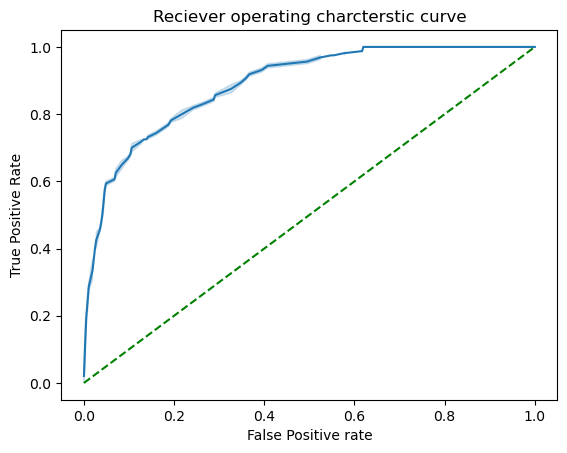

In [64]:
model.fit(x_train,y_train)
probs=model.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,thresold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)
print("model used is ::",model)
sns.lineplot(x=fpr,y=tpr)
plt.plot([0,1],[0,1],color="green",linestyle='--')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title('Reciever operating charcterstic curve')
plt.show()